<a href="https://colab.research.google.com/github/Sultonisky/Google-Colab-SVR/blob/main/Manual_SVR_Bali.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -r requirements.txt

In [2]:
import os
import sys

sys.path.append("/content")

required_py = "SVR_Manual_Bali.py"

print("[INFO] Checking for SVR_Manual_Bali.py...")

# Check if main file exists
if os.path.exists(required_py):
    print("[SUCCESS] SVR_Manual_Bali.py found.")
else:
    print("[WARNING] SVR_Manual_Bali.py not found. Searching for similar filenames...")

    # Find alternative files such as SVR_Manual_Bali (1).py or similar
    for f in os.listdir("/content"):
        if f.startswith("SVR_Manual_Bali") and f.endswith(".py") and f != required_py:
            os.rename(f, required_py)
            print("[INFO] Similar Python file found and renamed to SVR_Manual_Bali.py")
            break
    else:
        print("[ERROR] No matching Python file found. Please ensure the file has been uploaded to Colab.")


[INFO] Checking for SVR_Manual_Bali.py...
[SUCCESS] SVR_Manual_Bali.py found.


In [3]:
import importlib.util

spec = importlib.util.spec_from_file_location("SVR_Manual_Bali", "SVR_Manual_Bali.py")
mod = importlib.util.module_from_spec(spec)
spec.loader.exec_module(mod)

SVRForecasting = mod.SVRForecasting

file_path = "dataset_bali_2017_2025.xlsx"
forecaster = SVRForecasting(file_path)

# Load data sheet pertama
if not forecaster.load_data(sheet_name=0):
    raise SystemExit("Failed to load data")

# Parameter manual
w1, w2, b = 0.01152, -0.000843, 0.02091

calculation_ok = forecaster.calculate_manual_svr(
    rooms_sold_col=None,
    rooms_available_col=None,
    w1=w1, w2=w2, b=b,
    output_col="X",
    n_rows=10
)

if calculation_ok:
    forecaster.explain_svr_calculation()
    # Simpan dataset dengan kolom X
    from datetime import datetime
    ts = datetime.now().strftime("%Y%m%d_%H%M%S")
    output_file = f"dataset_bali_with_svr_{ts}.xlsx"
    forecaster.data.to_excel(output_file, index=False)
    print(f"[SUCCESS] Saved {output_file}")

STEP 1: MEMUAT DATA DARI FILE EXCEL

[SUCCESS] Data loaded successfully!
Number of rows: 3287
Number of columns: 26

Data preview:
   date_time  year  month  day  dayofweek  is_weekend season  \
0 2017-01-01  2017      1    1          6           1  Rainy   
1 2017-01-02  2017      1    2          0           0  Rainy   
2 2017-01-03  2017      1    3          1           0  Rainy   
3 2017-01-04  2017      1    4          2           0  Rainy   
4 2017-01-05  2017      1    5          3           0  Rainy   

              nama_hotel  lead_time  stays_in_week_nights  ...  \
0         Nusa Dua Grand         89                     2  ...   
1  Seminyak Sunset Hotel         36                     3  ...   
2   Uluwatu Cliff Resort          4                     3  ...   
3       Legian Ocean Inn         74                     3  ...   
4         Nusa Dua Grand         13                     4  ...   

   holiday_kuningan  holiday_school  holiday_natal_newyear  holiday_or_event  \
0      


PENJELASAN PERHITUNGAN SVR (SUPPORT VECTOR REGRESSION)

1) Rumus inti (kernel linear)
   y = (w1 * rooms_sold) + (w2 * rooms_available) + b
   Dipakai apa adanya (tanpa scaling), sesuai parameter yang diberikan.

2) Parameter yang digunakan
   - w1 = 0.01152   → pengaruh rooms_sold (positif)
   - w2 = -0.000843 → pengaruh rooms_available (negatif)
   - b  = 0.02091   → bias/intercept (baseline saat fitur = 0)

3) Contoh perhitungan (langkah eksplisit)
   Misal rooms_sold = 100, rooms_available = 200:
   a. Kontribusi rooms_sold:      0.01152 * 100  = 1.15200
   b. Kontribusi rooms_available: -0.000843 * 200 = -0.16860
   c. Tambahkan bias:             +0.02091
   d. Total: y = 1.15200 - 0.16860 + 0.02091 = 1.00431

4) Interpretasi cepat
   - w1 positif: rooms_sold naik → prediksi naik.
   - w2 negatif: rooms_available naik → prediksi turun (lebih banyak kamar kosong).
   - b sebagai baseline jika semua fitur 0; pada data nyata biasanya y bergantung pada skala fitur.

5) Kenapa linear?

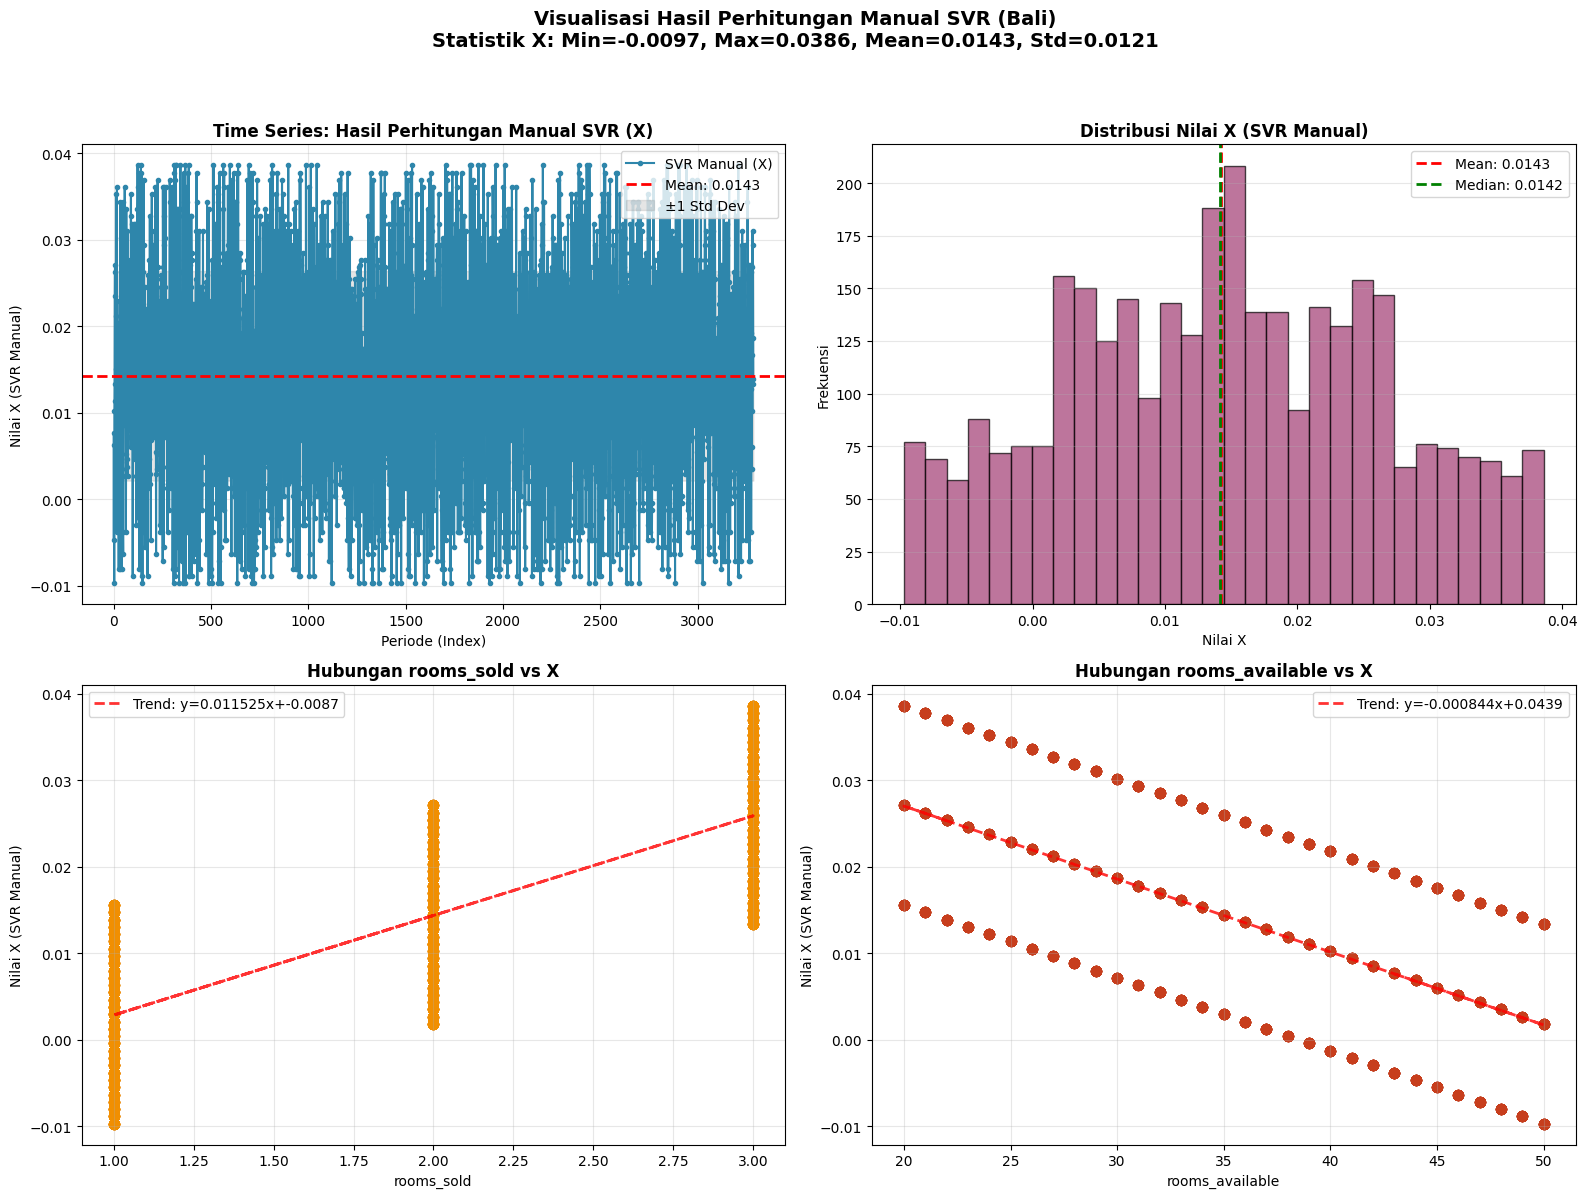

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [15]:
from google.colab import files
if calculation_ok:
    forecaster.explain_svr_calculation()

    # Simpan visualisasi manual SVR
    forecaster.visualize_manual_svr_results(
        x_col="X",
        rooms_sold_col=None,
        rooms_available_col=None
    )

    # Auto-download hasil visualisasi
    # Correcting the file path to match where the visualization was actually saved.
    files.download("/result/img/SVR_Manual_Bali_visualization.png")